<a href="https://colab.research.google.com/github/pingjcole/Data110-2025Fall/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Final Project**

These five visualizations' purpose is to explore patterns, trends, and disparities in adult oral health across the United States using data from the CDC’s National Oral Health Surveillance System. Each visualization serves a specific meaning, including broad temporal trends to distributions, geographic patterns, interactive exploration, and state-level comparisons. Static charts are used to clearly communicate overall trends and distributions, while interactive visuals allow deeper engagement with time-based and geographic differences.

I hope to use these visualizations to transform complex public health data into an accessible narrative that highlights how adult oral health outcomes vary over time and place, and why these patterns matter for understanding population health and informing public health decision-making.

These are what I have:

| Visualization Type      | Static / Interactive |
| ----------------------- | -------------------- |
| Line Chart              |  Static             |
| Histogram               |  Static             |
| Choropleth Map  |  Interactive        |
| Line Chart  |  Interactive        |
| Bar Chart        |  Static        |


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import altair as alt

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/pingjcole/Data110-2025Fall/refs/heads/main/NOHSS_Adult_Indicators.csv')

# Keep only useful columns for visualization
df = df[['Year', 'LocationDesc', 'LocationAbbr', 'Category',
         'Indicator', 'Data_Value', 'Break_Out_Category']]

# Convert Year to integer
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop rows with missing values in key columns
df = df.dropna(subset=['Data_Value', 'LocationAbbr'])


In [18]:
print(df.describe())

               Year    Data_Value
count  28249.000000  28249.000000
mean    2016.063011     50.506124
std        2.828426     23.056074
min     2012.000000      0.000000
25%     2014.000000     32.600000
50%     2016.000000     50.600000
75%     2018.000000     68.300000
max     2020.000000    100.000000


In [19]:
# View column names
print(df.columns)


Index(['Year', 'LocationDesc', 'LocationAbbr', 'Category', 'Indicator',
       'Data_Value', 'Break_Out_Category'],
      dtype='object')


**Viz 1 Line Chart — "Trend of Average Adult Health Indicator Over Time"**

Caption:

This line chart visualizes how the average value of adult health indicators has changed over time. By presenting long-term trends, the chart helps identify periods of improvement, stagnation, or decline in public health outcomes, providing important context for understanding national health progress.

Please note that this upward trend does NOT necessarily mean oral health is getting worse or better overall—it means that the average measured values are increasing, which must be interpreted in the context of the indicators included.

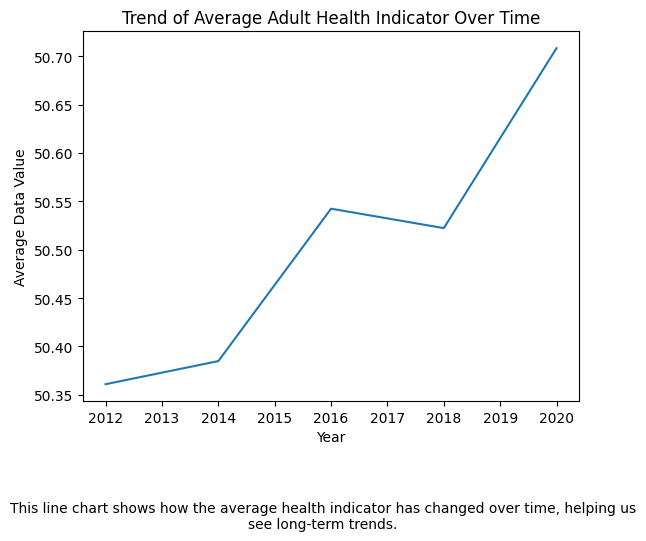

In [20]:
trend = df.groupby('Year')['Data_Value'].mean()

plt.figure()
plt.plot(trend)
plt.title("Trend of Average Adult Health Indicator Over Time")
plt.xlabel("Year")
plt.ylabel("Average Data Value")

plt.figtext(0.5, -0.15,
    "This line chart shows how the average health indicator has changed over time, helping us see long-term trends.",
    wrap=True, horizontalalignment='center')

plt.show()


**Viz 2 Histogram — “Distribution of Health Indicator Values”**

Caption:

This histogram shows the distribution of health indicator values across the dataset. It highlights the most common value ranges and reveals the presence of outliers, helping to assess variability and identify potential areas of concern or data quality issues.

Please note tha because the indicators measure different concepts, this visualization should be interpreted as a descriptive overview of all reported health indicator values, not a comparison between indicators.


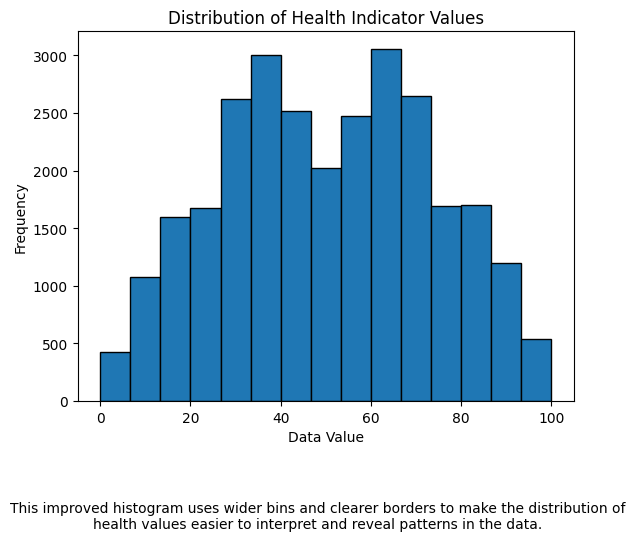

In [21]:

plt.figure()

plt.hist(df['Data_Value'], bins=15, edgecolor='black')

plt.title("Distribution of Health Indicator Values")
plt.xlabel("Data Value")
plt.ylabel("Frequency")

plt.figtext(
    0.5, -0.15,
    "This improved histogram uses wider bins and clearer borders to make the distribution of health values easier to interpret and reveal patterns in the data.",
    wrap=True, horizontalalignment='center'
)

plt.show()


**Viz 3 Interactive Choropleth Map — "Geographic Disparities in Adult Health Across the United States"**

Caption:

This map visualizes a single oral health indicator - the percentage of adults aged 65 and older who have lost all natural teeth, aggregated at the state level. It demonstrates that oral health outcomes among U.S. adults are geographically uneven. Each state is shaded based on the average value of the indicator, expressed as a percentage of the total population that participated in the survey. Certain regions show consistently higher average values, suggesting greater health challenges, while others display more favorable outcomes.

In [22]:
state_data = df.groupby('LocationAbbr')['Data_Value'].mean().reset_index()

m = folium.Map(
    location=[37.8, -96],
    zoom_start=4,
    min_zoom=4,
    max_bounds=True
)

m.fit_bounds([[24.396308, -125.0], [49.384358, -66.93457]])

state_geo = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json"

folium.Choropleth(
    geo_data=state_geo,
    data=state_data,
    columns=['LocationAbbr', 'Data_Value'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Health Indicator Value'
).add_to(m)

m.get_root().html.add_child(folium.Element(
    "<p style='font-size:14px'>This interactive choropleth map displays average adult health indicator values across U.S. states, highlighting geographic disparities in health outcomes.</p>"
))

m


**Viz 4 Interactive Line Chart —  “Health Trends by Category Over Time”**

Caption:

This interactive line chart displays the overall trend of adult oral health indicators over time. Rather than separating individual measures, the visualization aggregates all adult oral health indicators into a single annual average, resulting in one line that summarizes broad changes across years, making it easier to understand how various aspects of adult health have progressed or declined over time.

Please note that although the chart shows only one line, it incorporates multiple adult oral health indicators from the dataset that are related to adult oral health behaviors and outcomes, such as dental care utilization and tooth loss. All indicators belong to the same category “Adult” and are averaged together for each year.

In [23]:
agg_data = df.groupby(['Year', 'Category'])['Data_Value'].mean().reset_index()

line_chart = alt.Chart(agg_data).mark_line(point=True).encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Data_Value:Q', title='Average Data Value'),
    color=alt.Color('Category:N', title='Category'),
    tooltip=[
        alt.Tooltip('Year:O', title='Year'),
        alt.Tooltip('Category:N', title='Category'),
        alt.Tooltip('Data_Value:Q', title='Avg Value', format='.2f')
    ]
).properties(
    title='Interactive Line Chart of Average Health Indicator by Year and Category'
).interactive()

line_chart


alt.Chart(...)

**Viz 5 Bar Chart - Aaverage Adult Health Indicator Value on the State Level**

Visualization 5 presents a horizontal bar chart that ranks each U.S. state based on its average adult health indicator value across ALL measures included in the dataset. By aggregating the data at the state level, this chart offers a high-level view of overall health outcomes, allowing us to compare which states are experiencing higher overall health burdens, and which are performing comparatively better.

Please note that this chart averages MANY percentages together. For example, a value of 50% on the X axis means When we average all adult oral health indicator percentages reported for this state across indicators and years, the resulting average is approximately 50%.

In [24]:
# First I need to create state-level average values for visualization 5, I had problem with this but AI helped me at the end
state_avg = (
    df.groupby('LocationDesc')['Data_Value']
      .mean()
      .sort_values()
)


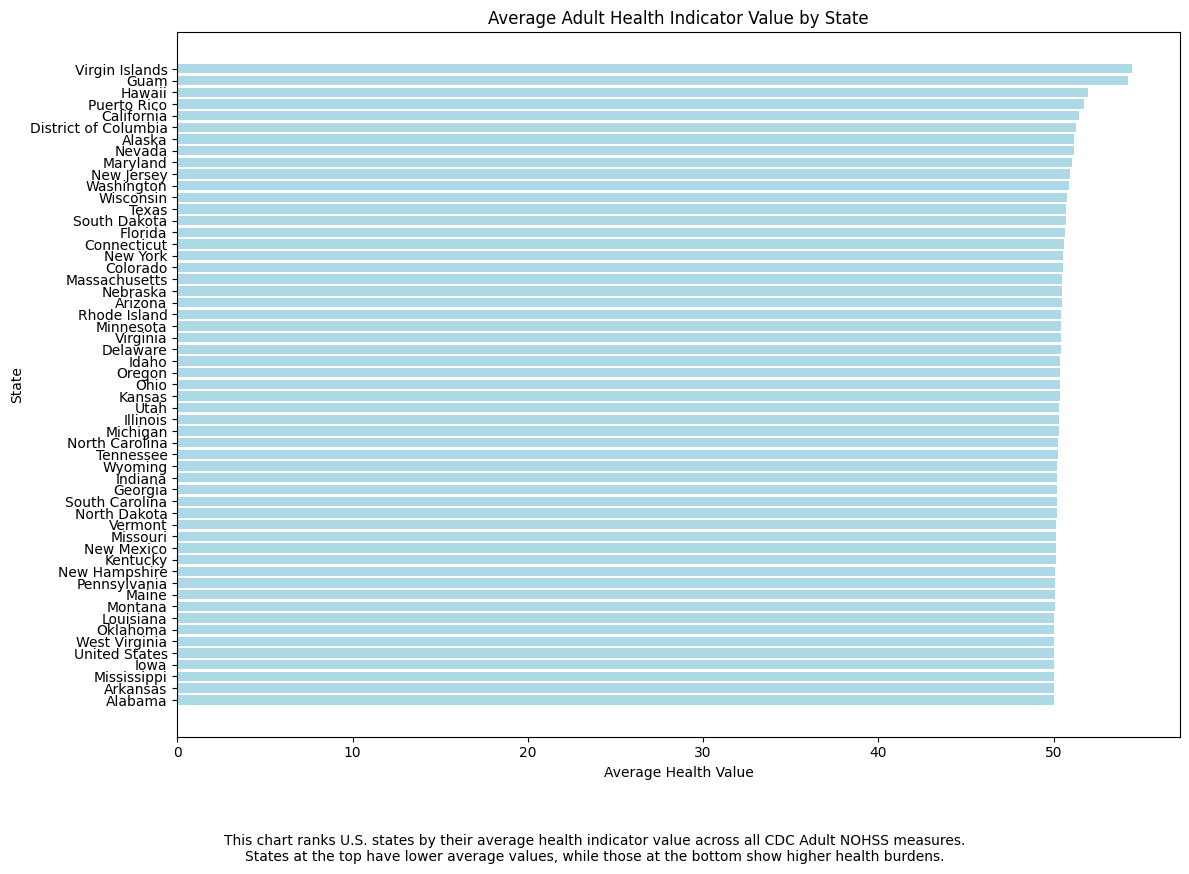

In [25]:

plt.figure(figsize=(12, 8))
plt.barh(state_avg.index, state_avg.values, color="lightblue")

plt.title("Average Adult Health Indicator Value by State")
plt.xlabel("Average Health Value")
plt.ylabel("State")

plt.figtext(
    0.5, -0.08,
    "This chart ranks U.S. states by their average health indicator value across all CDC Adult NOHSS measures.\n"
    "States at the top have lower average values, while those at the bottom show higher health burdens.",
    wrap=True,
    horizontalalignment='center'
)

plt.tight_layout()
plt.show()
